In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
import os

In [41]:
data = pd.read_csv('Dataset_fix.csv')
data

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
557,559,NAMA 558,28.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
558,560,NAMA 559,41.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
559,561,NAMA 560,32.0,2,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    float64
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int64  
 5   PE/Non PE                               561 non-null    int64  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  OBESITAS_Tidak                          561 non-null    float6

In [43]:
data = data.drop(columns=['NO', 'NAMA'])

In [44]:
# Menghitung jumlah NaN di setiap kolom
nan_counts = data.isnull().sum()

# Tampilkan kolom yang memiliki NaN
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


In [45]:
# imputer = SimpleImputer(strategy='mean')
# data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [46]:
data.shape

(561, 16)

In [47]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['PE/Non PE'], axis=1),
#     data['PE/Non PE'],
#     test_size=0.0001,
#     random_state=0)

X_train = data.drop(labels=['PE/Non PE'], axis=1)
y_train = data['PE/Non PE']

In [48]:
X_train.head()

,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,23.0,3,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,29.0,2,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,20.0,1,2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,18.0,1,2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,34.0,3,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [49]:
X_train.shape

(561, 15)

In [50]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.        , 0.06253603, 0.06630804,
       0.08679494, 0.07732316, 0.00634547, 0.01427963, 0.00195872,
       0.00476469, 0.00728648, 0.0159044 , 0.        , 0.        ])

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

,0
RIW PE_Ada,0.086795
RIW PE_Tidak,0.077323
RIW HIPERTENSI_Ya,0.066308
RIW HIPERTENSI_Tidak,0.062536
RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,0.015904
OBESITAS_Ya,0.014280
RIW HIPERTENSI/PE DALAM KELUARGA_Ada,0.007286
OBESITAS_Tidak,0.006345
RIW DM_Ya,0.004765
RIW DM_Tidak,0.001959


<Axes: >

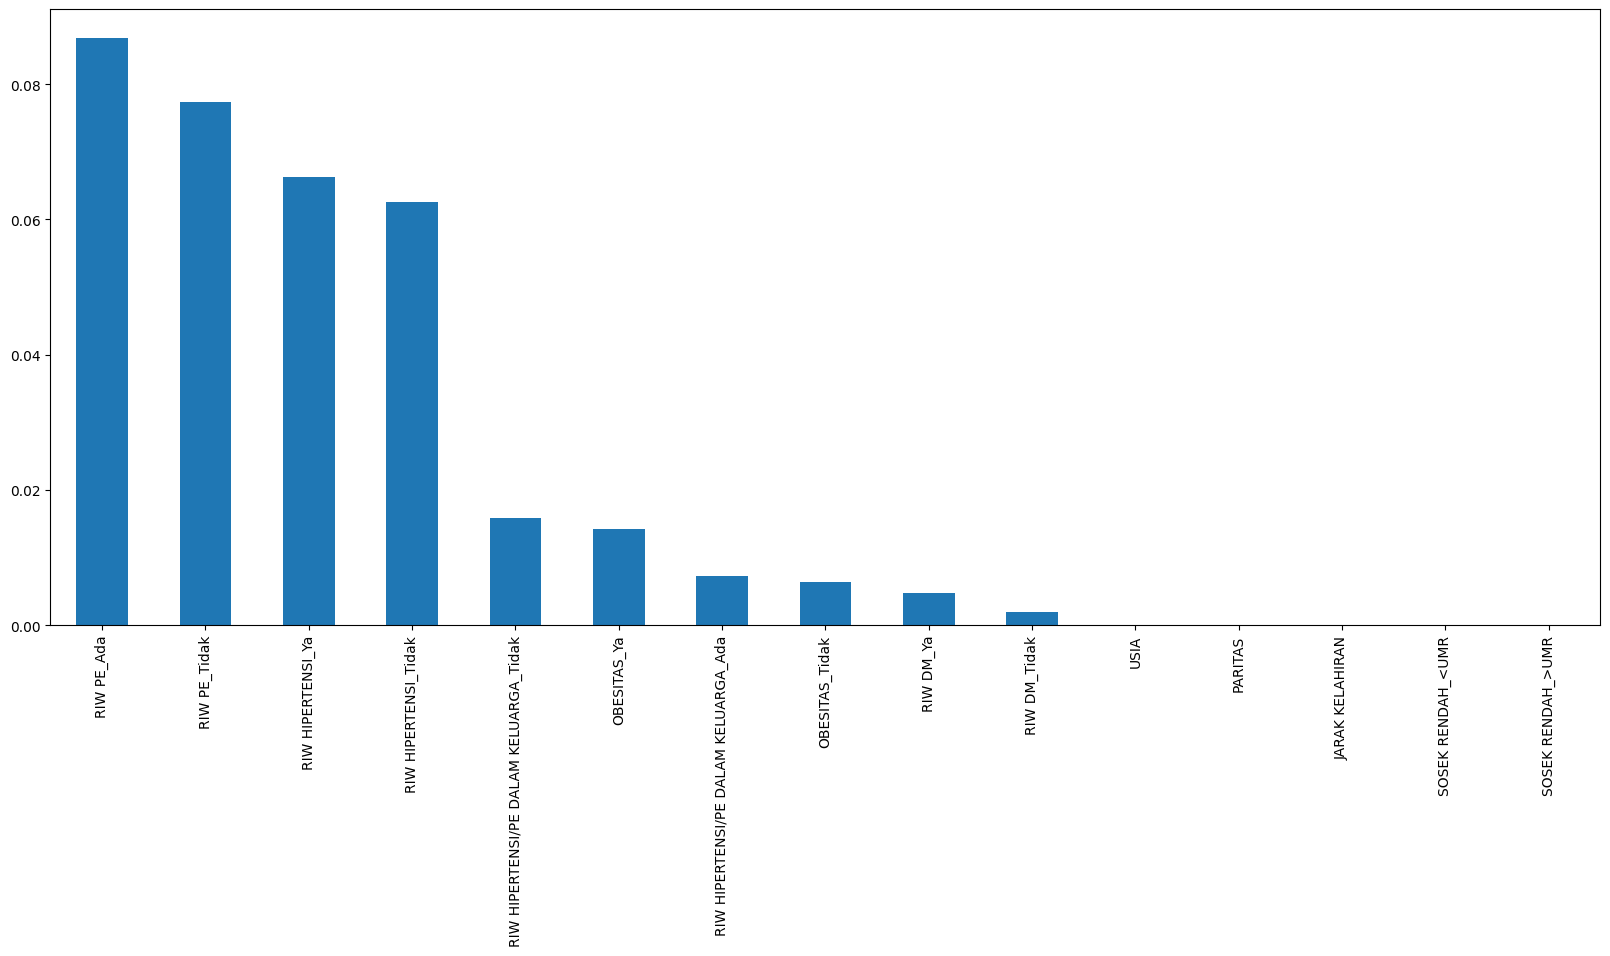

In [52]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [53]:
# from sklearn.feature_selection import SelectKBest
# sel_ten_cols = SelectKBest(mutual_info_classif, k=11)
# sel_ten_cols.fit(X_train, y_train)
# X_train.columns[sel_ten_cols.get_support()]
# # Dapatkan nama kolom-kolom yang terpilih
# selected_columns = X_train.columns[sel_ten_cols.get_support()]

In [54]:
ig_series = pd.Series(mutual_info)

In [55]:
# Filter the Series to keep only attributes with non-zero values
selected_columns = ig_series[ig_series > 0]

print("Selected attributes with non-zero Information Gain:")
print(selected_columns)

Selected attributes with non-zero Information Gain:
RIW HIPERTENSI_Tidak                      0.062536
RIW HIPERTENSI_Ya                         0.066308
RIW PE_Ada                                0.086795
RIW PE_Tidak                              0.077323
OBESITAS_Tidak                            0.006345
OBESITAS_Ya                               0.014280
RIW DM_Tidak                              0.001959
RIW DM_Ya                                 0.004765
RIW HIPERTENSI/PE DALAM KELUARGA_Ada      0.007286
RIW HIPERTENSI/PE DALAM KELUARGA_Tidak    0.015904
dtype: float64


In [56]:
# Buat DataFrame baru (X_train2) dengan hanya fitur-fitur yang terpilih
X_train2 = X_train[selected_columns.index]

In [57]:
X_train2.shape

(561, 10)

In [58]:
X_train2

,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
556,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
557,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
558,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
559,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [59]:
data2 = pd.concat([X_train2, y_train.reset_index(drop=True)], axis=1)

# # Simpan ke file CSV
# data2.to_csv('datasets-jadi-MI.csv', index=False)

In [60]:
data2.shape

(561, 11)

In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   RIW HIPERTENSI_Tidak                    561 non-null    float64
 1   RIW HIPERTENSI_Ya                       561 non-null    float64
 2   RIW PE_Ada                              561 non-null    float64
 3   RIW PE_Tidak                            561 non-null    float64
 4   OBESITAS_Tidak                          561 non-null    float64
 5   OBESITAS_Ya                             561 non-null    float64
 6   RIW DM_Tidak                            561 non-null    float64
 7   RIW DM_Ya                               561 non-null    float64
 8   RIW HIPERTENSI/PE DALAM KELUARGA_Ada    561 non-null    float64
 9   RIW HIPERTENSI/PE DALAM KELUARGA_Tidak  561 non-null    float64
 10  PE/Non PE                               561 non-null    int64 

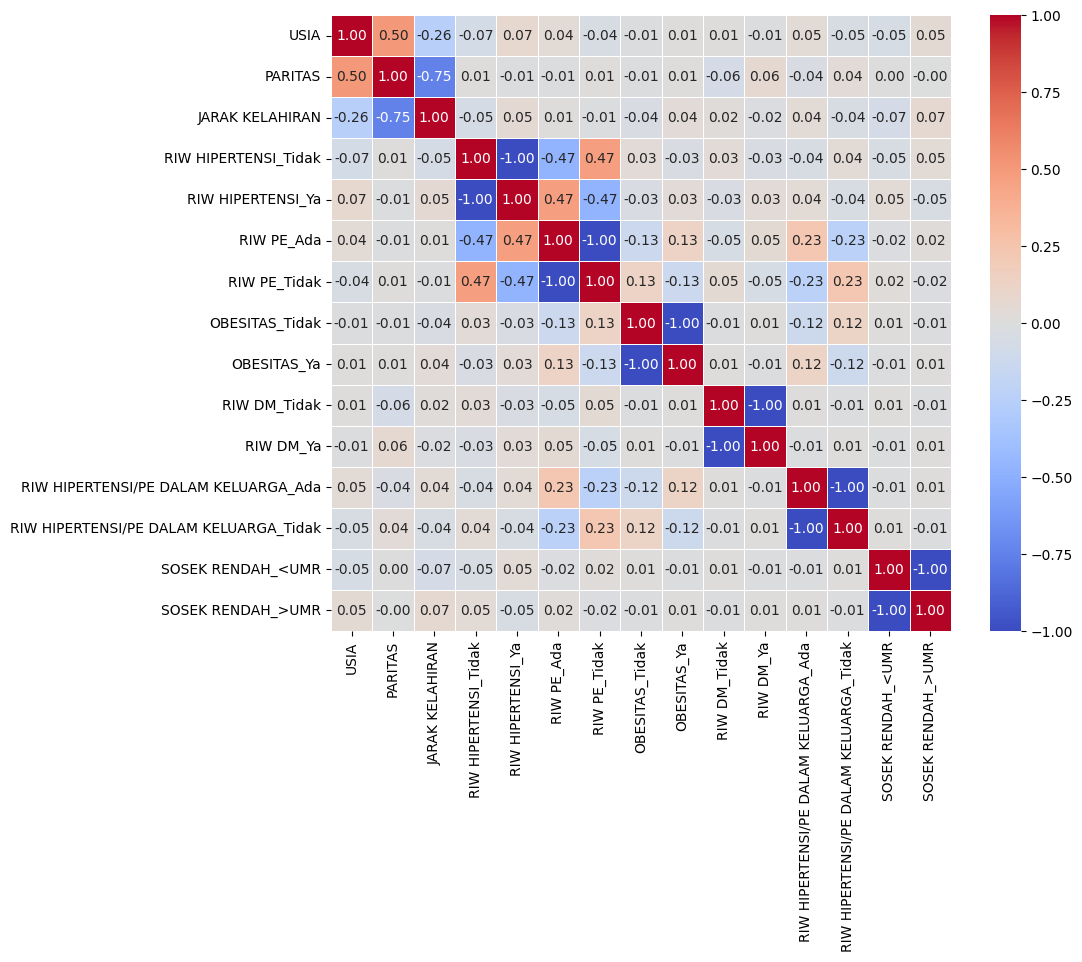

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
corr_matrix = X_train.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Membuat heatmap dengan Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menampilkan plot
plt.show()


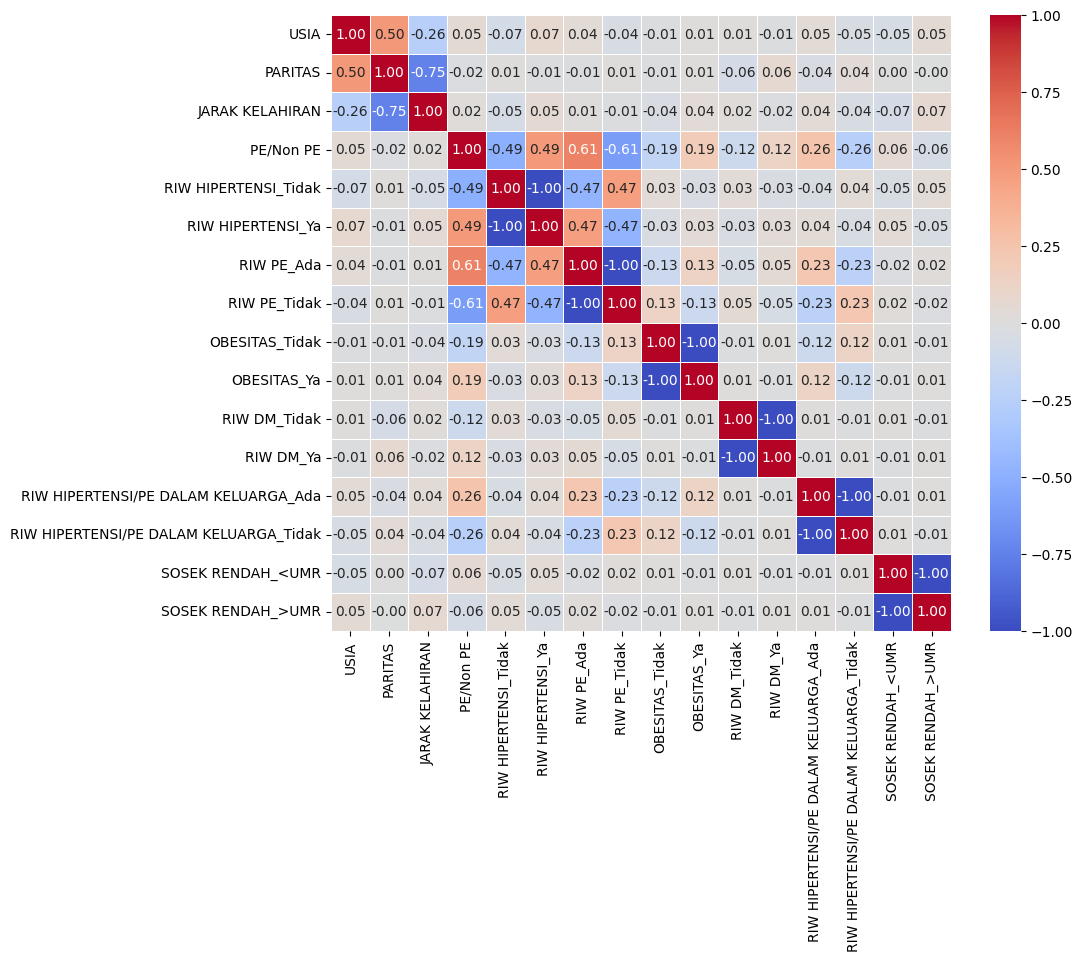

In [63]:
# Menghitung matriks korelasi
corr_matrix = data.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Membuat heatmap dengan Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menampilkan plot
plt.show()


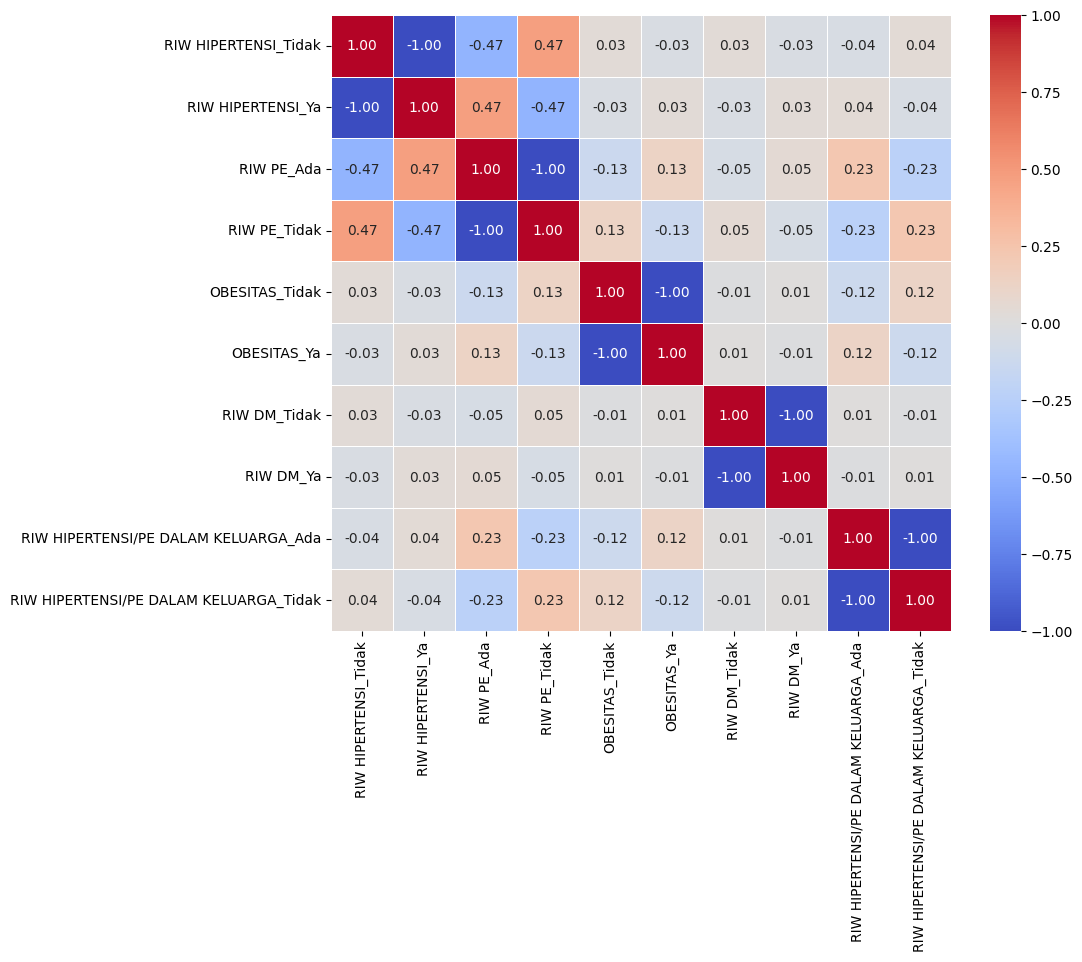

In [64]:
# Menghitung matriks korelasi
corr_matrix = X_train2.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Membuat heatmap dengan Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menampilkan plot
plt.show()

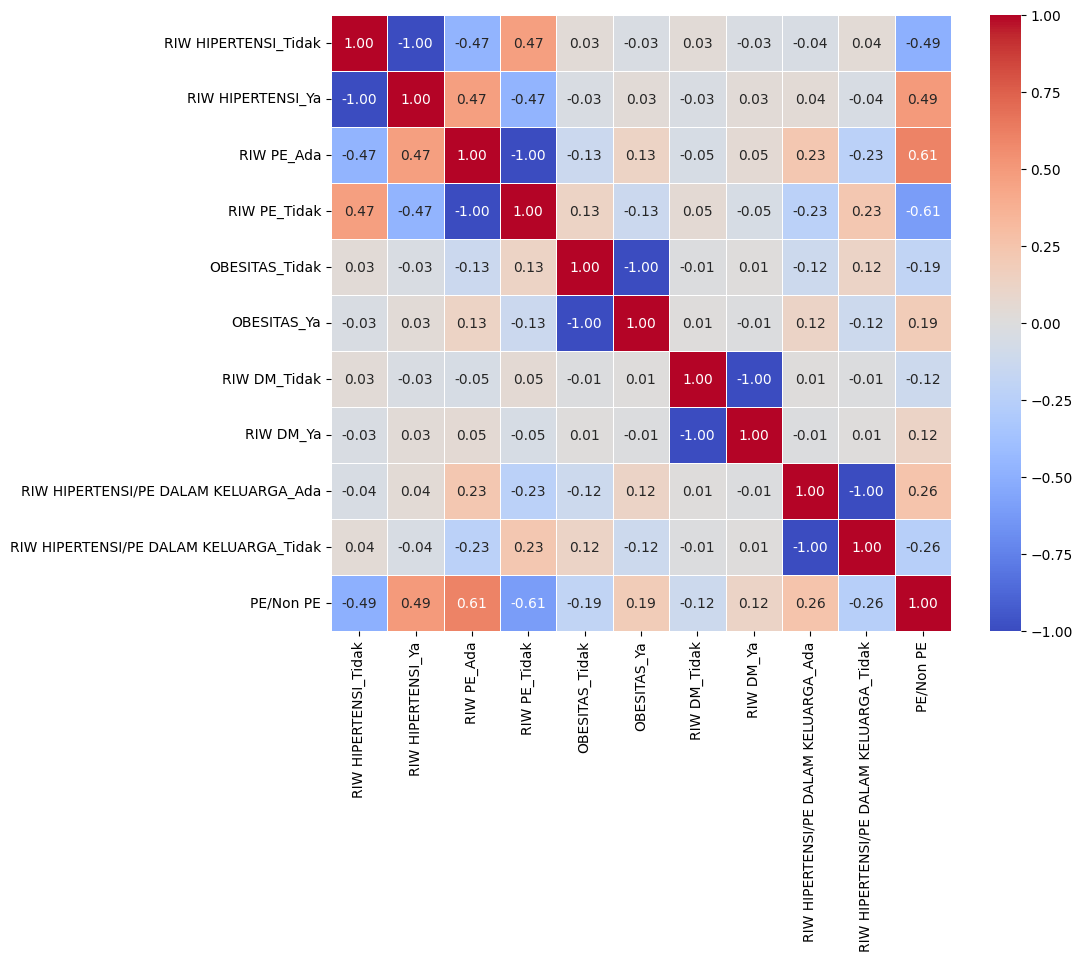

In [65]:
# Menghitung matriks korelasi
corr_matrix = data2.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Membuat heatmap dengan Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menampilkan plot
plt.show()

In [66]:
data.to_csv('datasets-jadi-MI.csv', index=False)